In [ ]:
#Install kaggle library
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt  # Import Matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 12.5MB/s]


In [ ]:
import zipfile
# Define the path to your zip file
file_path = '/content/diabetes-data-set.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/diabetes_predection')  # Replace 'destination_folder' with your desired folder

In [ ]:
# prompt: read the data /content/drive/MyDrive/diabetes_predection/diabetes.csv

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diabetes_predection/diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Data Visualization


Plotting the data distribution plots before removing null values

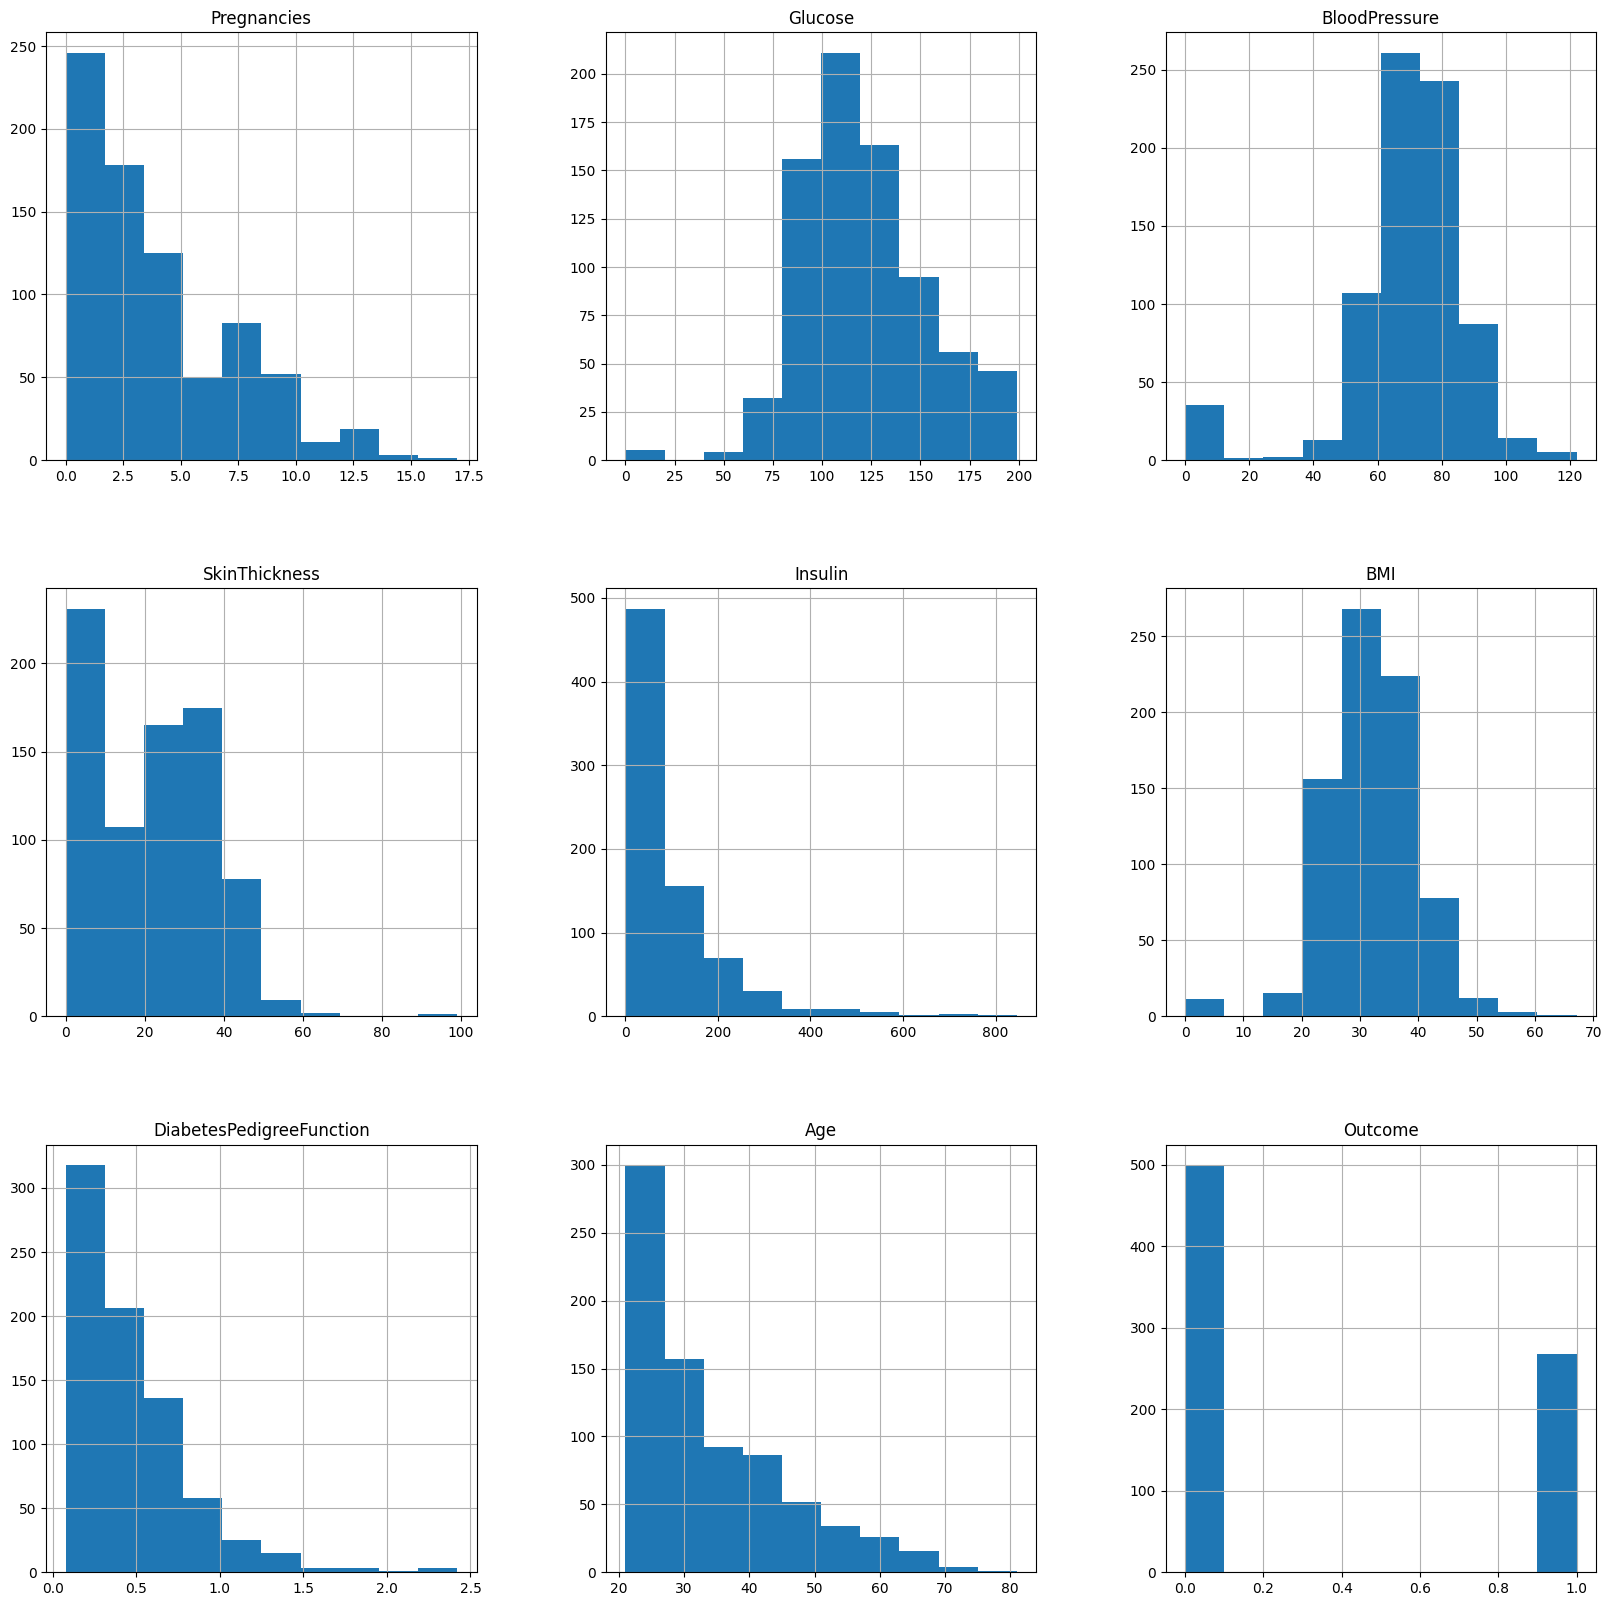

In [ ]:
p =df.hist(figsize = (20,20))
#In a histogram, the abscissa (x-axis) typically represents the range of values for the variable being measured,
#and the ordinate (y-axis) represents the frequency or count of observations falling within each interval or bin on the x-axis.

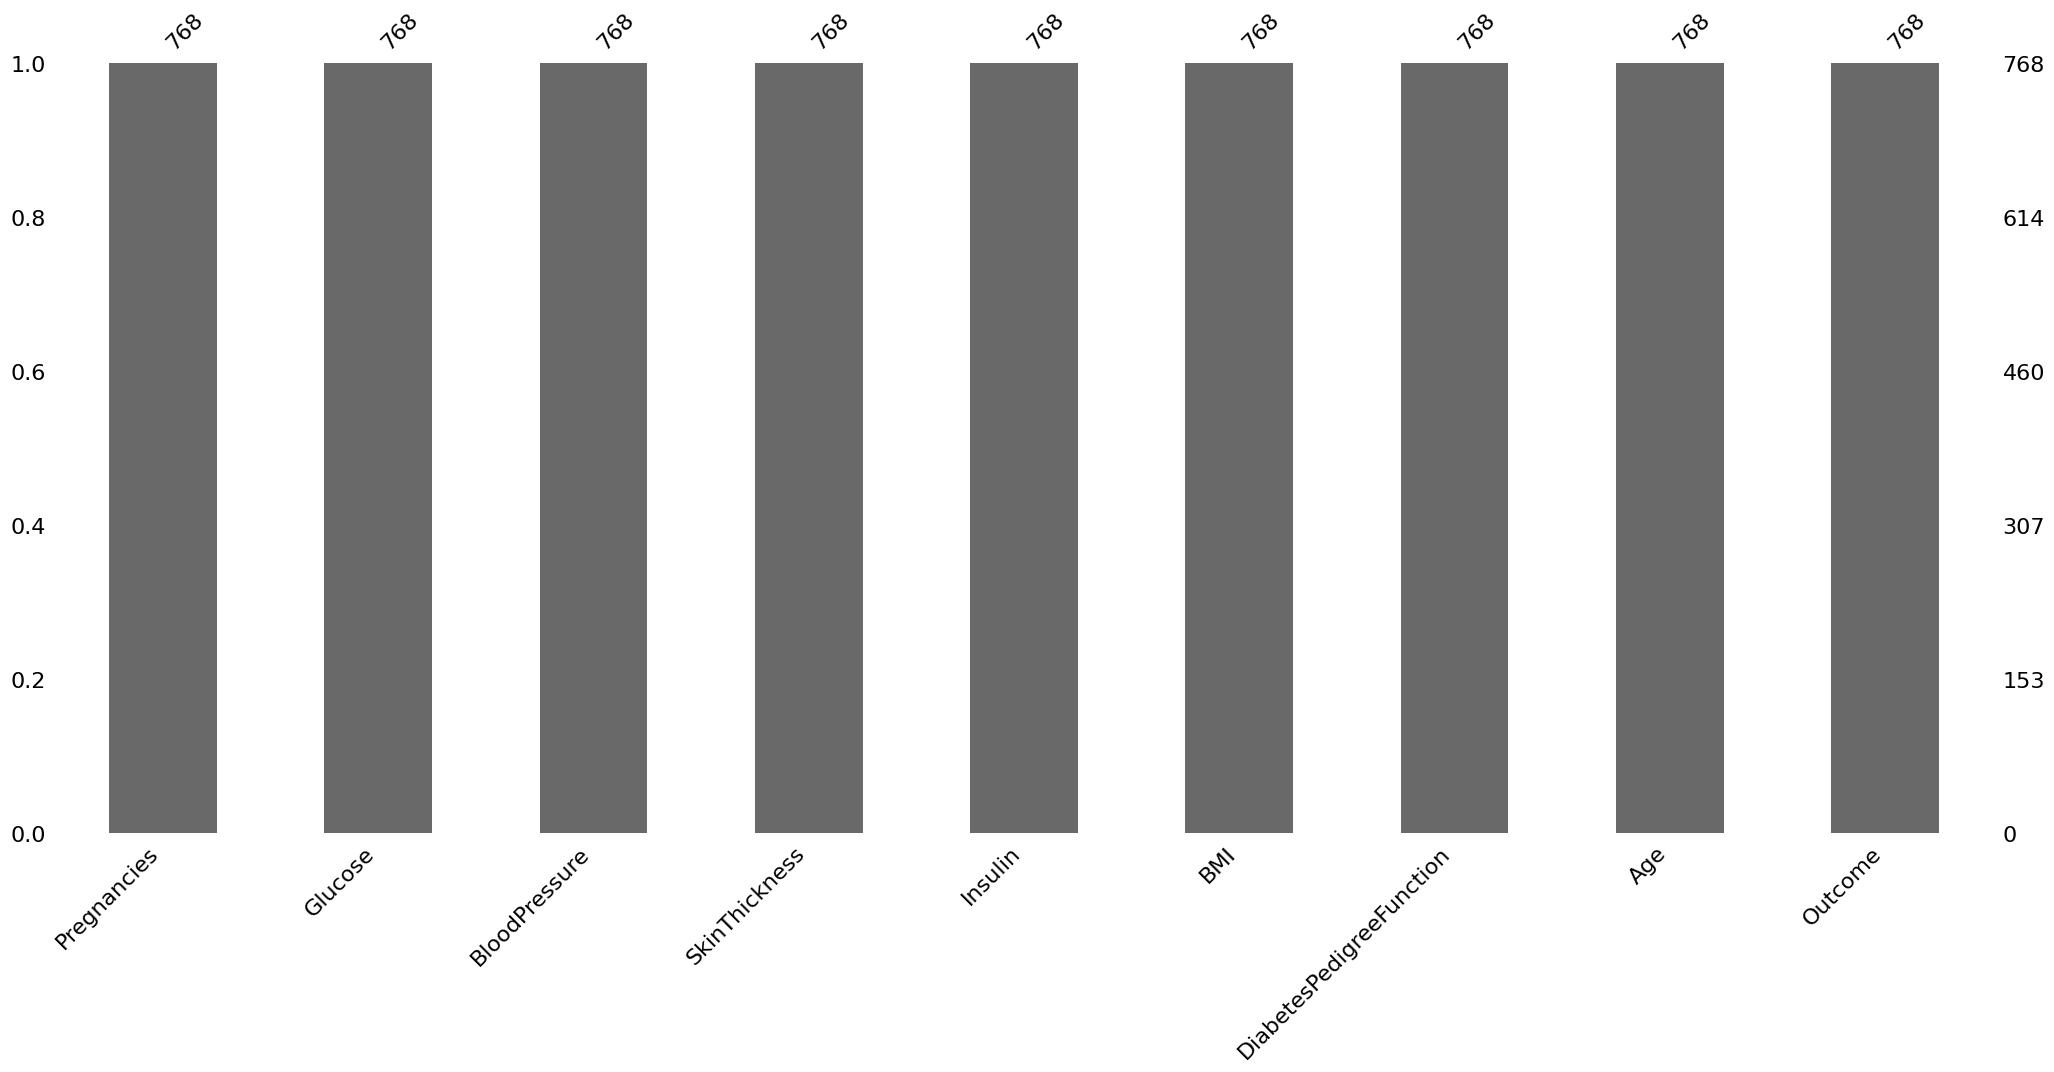

In [ ]:
p = msno.bar(df)
# missing values in a DataFrame (df).

Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

<ipython-input-9-4b164fc3ca11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['Glucose'])


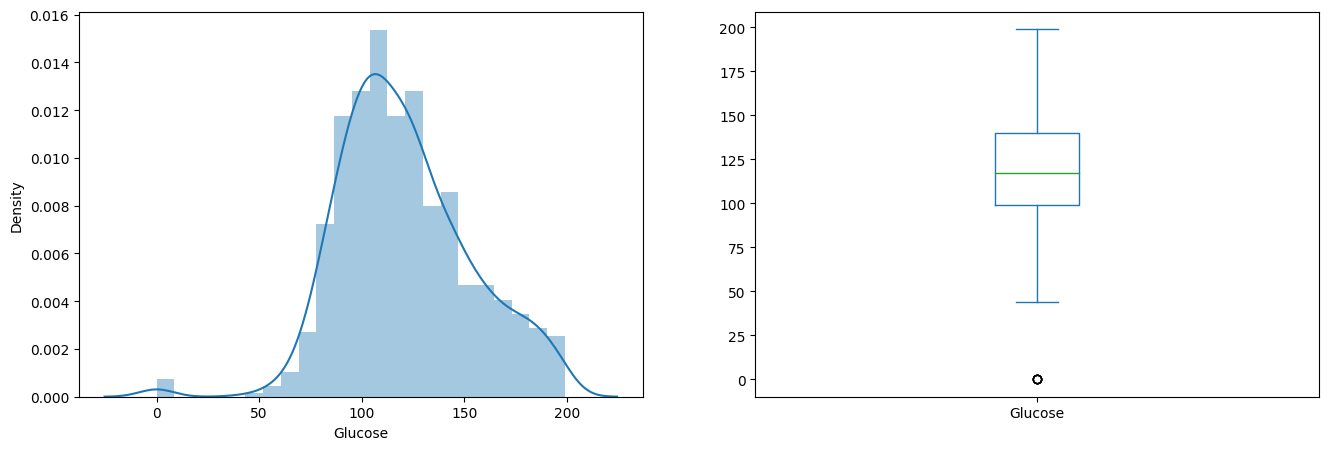

In [ ]:
plt.subplot(121), sns.distplot(df['Glucose'])
plt.subplot(122), df['Glucose'].plot.box(figsize=(16,5))
plt.show()

<ipython-input-10-1d062345beba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['Insulin'])


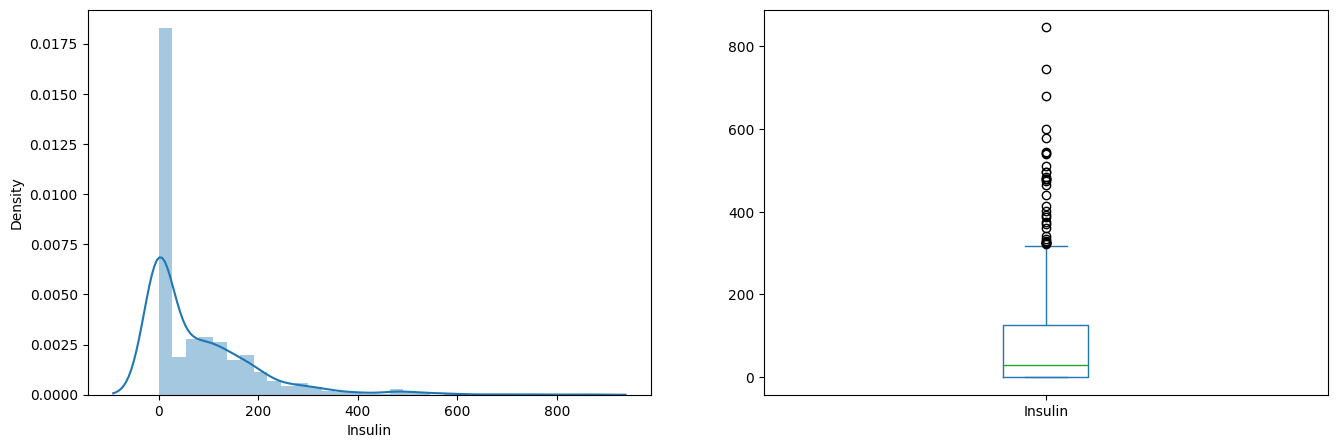

In [ ]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

<ipython-input-11-74081f40ec47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['Pregnancies'])


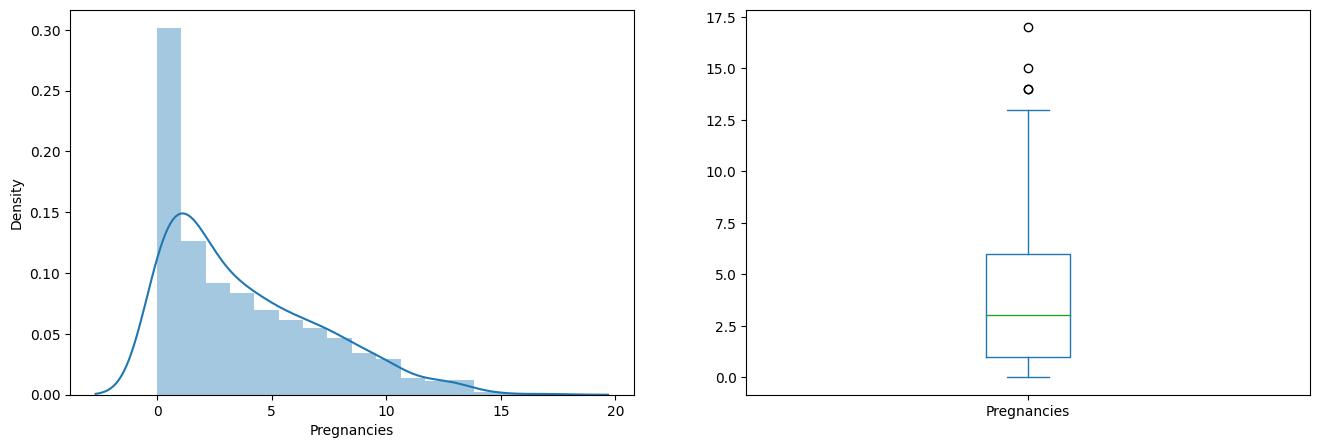

In [ ]:
plt.subplot(121), sns.distplot(df['Pregnancies'])
plt.subplot(122), df['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

<ipython-input-13-d44069265a2b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['DiabetesPedigreeFunction'])


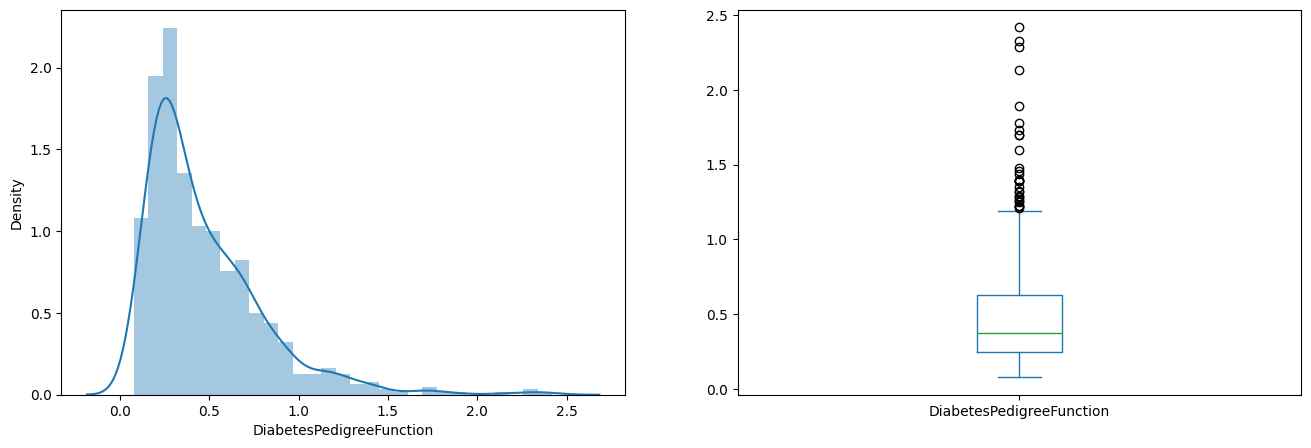

In [ ]:
plt.subplot(121), sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(122), df['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

<ipython-input-14-248a089a9de2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['SkinThickness'])


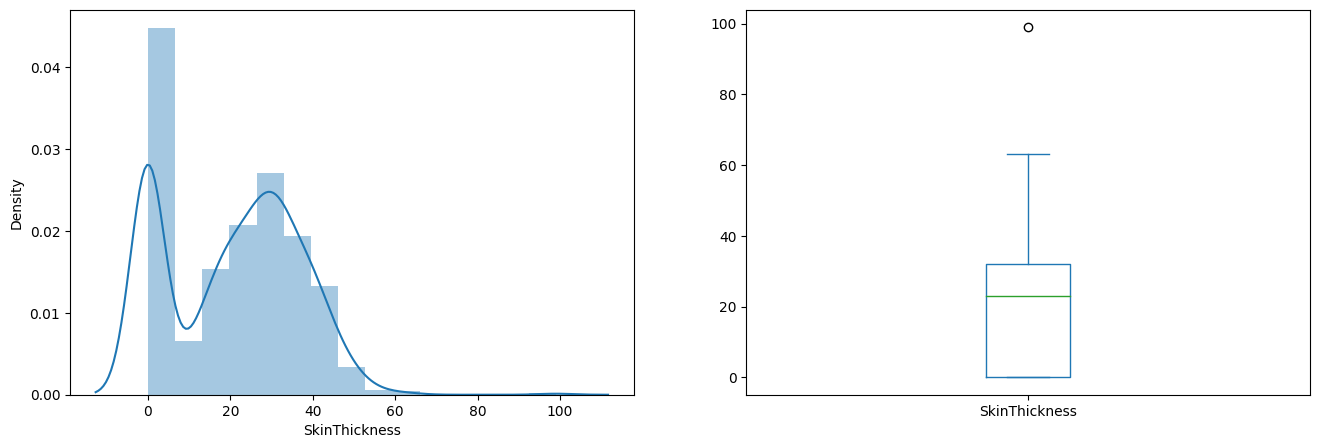

In [ ]:
plt.subplot(121), sns.distplot(df['SkinThickness'])
plt.subplot(122), df['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

## Correlation between all the features

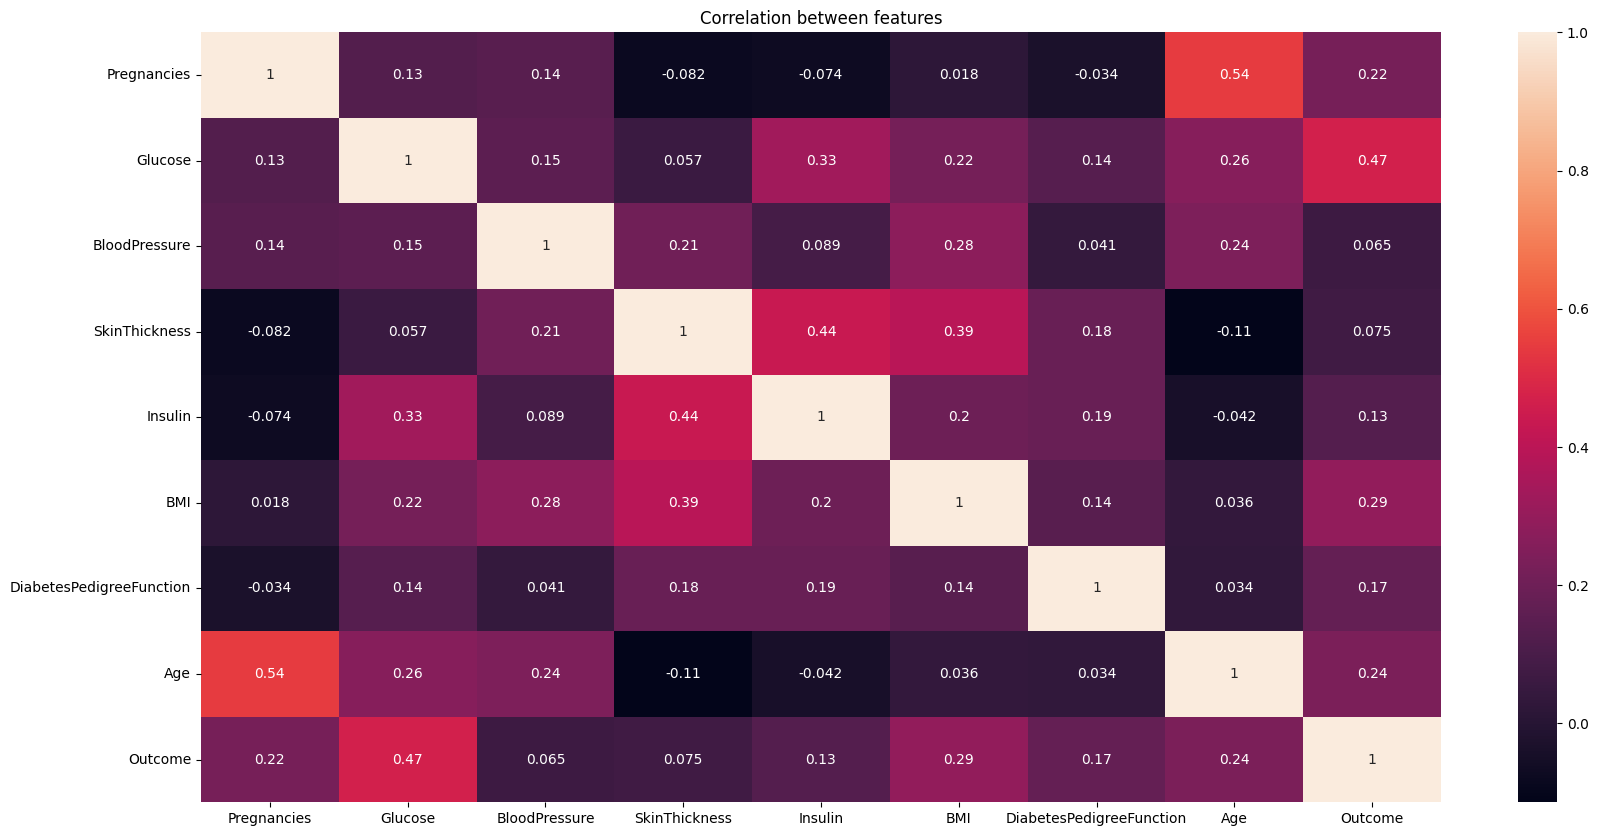

In [ ]:
# prompt: display the correlation between the features

# Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between features')
plt.show()


In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),), columns=['Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

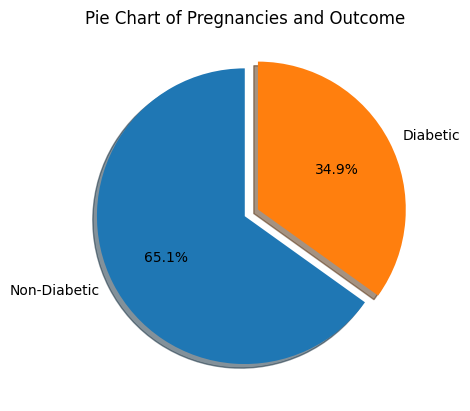

In [ ]:

df.groupby('Outcome').size().plot(kind='pie', labels=['Non-Diabetic','Diabetic'], autopct='%1.1f%%', startangle=90, shadow=True, explode=[0, 0.1])
plt.title('Pie Chart of Pregnancies and Outcome')
plt.show()


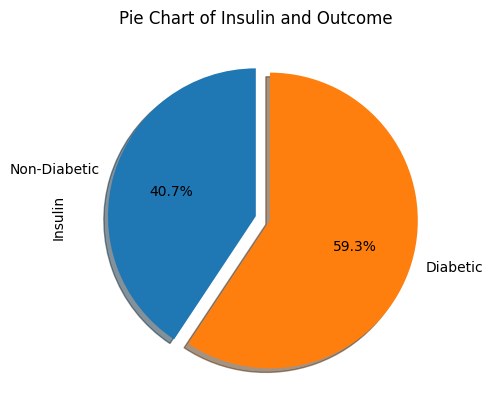

In [ ]:
# prompt: pie charts of outcome and insulin

df.groupby('Outcome')['Insulin'].mean().plot(kind='pie', labels=['Non-Diabetic','Diabetic'], autopct='%1.1f%%', startangle=90, shadow=True, explode=[0, 0.1])
plt.title('Pie Chart of Insulin and Outcome')
plt.show()


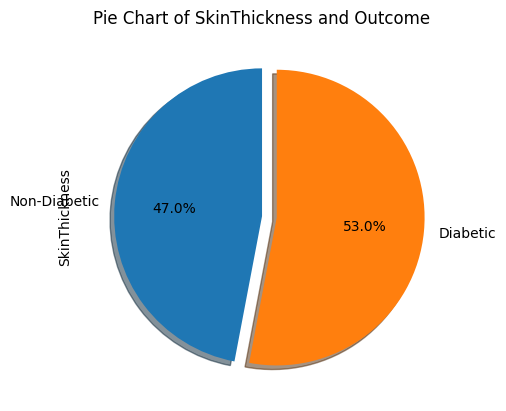

In [ ]:
# prompt: pie charts of outcome and SkinThickness

df.groupby('Outcome')['SkinThickness'].mean().plot(kind='pie', labels=['Non-Diabetic','Diabetic'], autopct='%1.1f%%', startangle=90, shadow=True, explode=[0, 0.1])
plt.title('Pie Chart of SkinThickness and Outcome')
plt.show()


In [ ]:
µdf.groupby("Outcome").agg({"Pregnancies":"mean"})


,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
df.groupby("Outcome").agg({"Insulin":"mean"})


,Insulin
Outcome,
0,68.792000
1,100.335821


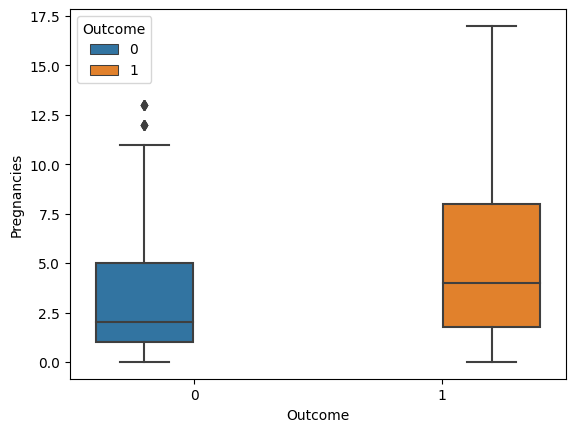

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a box plot
sns.boxplot(data=df, x='Outcome', y='Pregnancies', hue='Outcome')

# Display the plot
plt.show()


Majority of females taking part have 0 preganancies , also the number of pregnancies doesn't seem to have impact on wether someone is diabetic or not

<Axes: xlabel='BMI', ylabel='SkinThickness'>

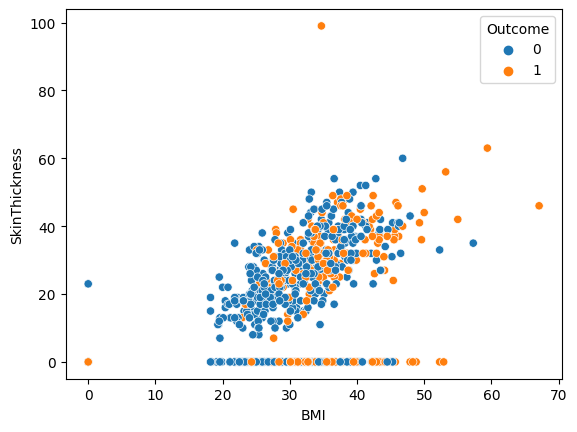

In [ ]:
sns.scatterplot(data=df,y='SkinThickness',x='BMI',hue='Outcome')


BMI range of 18.5-24.9 is generally considered as normal while those above 30 are considerd as obsese ans BMI above 55 is considerd as Morbid Obsese With increase in BMI skinthickness also increases and it seems that obses people are generally more prone to diabeties